In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline
pd.set_option('display.max_columns', None)

## Load The DataSet

In [3]:
df = pd.read_csv('phones_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


## EDA 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1224.0,611.500000,353.482673,0.0000,305.7500,611.5,917.25,1223.0
popularity,1224.0,612.500000,353.482673,1.0000,306.7500,612.5,918.25,1224.0
best_price,1224.0,7941.206699,8891.836260,214.0000,2599.7500,4728.0,9323.00,56082.0
lowest_price,964.0,7716.018672,8560.959059,198.0000,2399.0000,4574.0,9262.25,49999.0
highest_price,964.0,9883.410788,11514.936818,229.0000,2887.0000,5325.5,12673.75,69999.0
sellers_amount,1224.0,16.743464,20.597006,1.0000,2.0000,8.0,26.00,125.0
screen_size,1222.0,5.394378,1.476991,1.4000,5.1625,6.0,6.40,8.1
memory_size,1112.0,95.700059,111.922576,0.0032,32.0000,64.0,128.00,1000.0
battery_size,1214.0,3608.201812,1668.268774,460.0000,2900.0000,3687.0,4400.00,18800.0


In [6]:
df.columns

Index(['Unnamed: 0', 'brand_name', 'model_name', 'os', 'popularity',
       'best_price', 'lowest_price', 'highest_price', 'sellers_amount',
       'screen_size', 'memory_size', 'battery_size', 'release_date'],
      dtype='object')

In [14]:
df['popularity']

0        422
1        323
2        299
3        287
4       1047
        ... 
1219    1101
1220     530
1221    1174
1222     752
1223     952
Name: popularity, Length: 1224, dtype: int64

<AxesSubplot:>

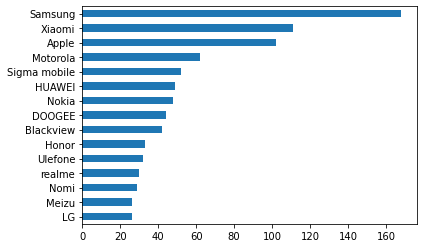

In [40]:
df['brand_name'].value_counts().head(15).sort_values().plot(kind='barh')

#### plot the Top brand_name based on popularity

The popularity of the phone in range 1-1224. 1224 is the most popular and 1 is least popular.

In [37]:
brand_popularity = df.groupby('brand_name')['popularity'].sum().reset_index()

brand_popularity = brand_popularity.sort_values('popularity', ascending=False).head(15)

brand_popularity

,brand_name,popularity
47,Samsung,114818
58,Xiaomi,89457
4,Apple,88550
24,HUAWEI,33786
36,Motorola,33084
38,Nokia,28315
9,Blackview,26462
49,Sigma mobile,23527
62,realme,19658
16,DOOGEE,18487


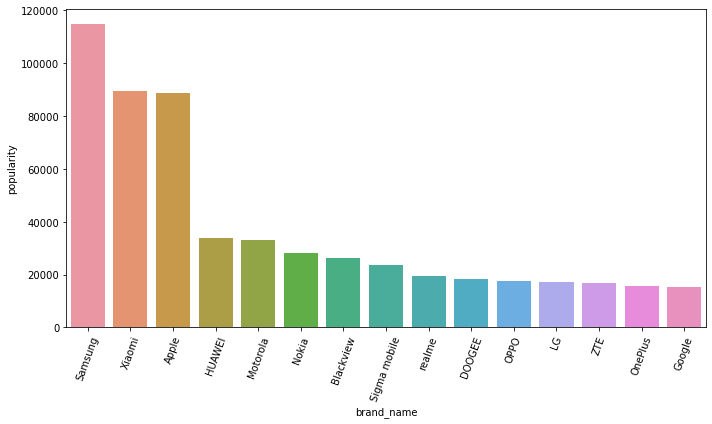

In [38]:
plt.figure(figsize=(10, 6))

sns.barplot(x='brand_name', y='popularity', data=brand_popularity)

plt.xticks(rotation=70)
plt.tight_layout()

## Analysis on Samsung 

In [42]:
samsung = df[df['brand_name'] == 'Samsung']
samsung

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
378,378,Samsung,G920F Galaxy S6 32GB (White Pearl),Android,845,3529.0,3100.0,3959.0,2,5.1,32.0,2550.0,3-2015
379,379,Samsung,G925F Galaxy S6 Edge 32GB (White Pearl),Android,325,4511.0,NaN,NaN,1,5.1,32.0,2600.0,3-2015
380,380,Samsung,G935FD Galaxy S7 Edge 32GB Gold (SM-G935FZDU),Android,605,5930.0,NaN,NaN,1,5.5,32.0,3600.0,2-2016
381,381,Samsung,Galaxy A01 2/16GB Black (SM-A015FZKD),Android,1163,2940.0,2673.0,3158.0,33,5.7,16.0,3000.0,1-2020
382,382,Samsung,Galaxy A01 Core 1/16GB Black (SM-A013FZKD),Android,1073,2344.0,2098.0,2553.0,50,5.3,16.0,3000.0,8-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,541,Samsung,Galaxy Z Flip 5G SM-F707 8/256GB Mystic Bronze,Android,696,22434.0,21930.0,24530.0,13,6.7,256.0,3300.0,10-2020
542,542,Samsung,Galaxy Z Flip SM-F700 8/256GB Mirror Purple (S...,Android,1029,35015.0,24588.0,41999.0,16,6.7,256.0,3300.0,2-2020
543,543,Samsung,Galaxy Z Fold2 12/256GB Mystic Black (SM-F916B...,Android,1099,51460.0,44809.0,59999.0,33,7.6,256.0,4500.0,8-2020
659,659,Samsung,N920C Galaxy Note 5 32GB (Gold Platinum),Android,31,5494.0,NaN,NaN,1,5.7,32.0,3000.0,10-2015


In [55]:
popular_samsung  = samsung.groupby('model_name')['popularity'].sum().reset_index()

popular_samsung = popular_samsung.sort_values(by='popularity', ascending=False).head()

popular_samsung

,model_name,popularity
96,Galaxy S10+ SM-G9750 DS 128GB Black,1632
61,Galaxy M51 6/128GB Black (SM-M515FZKD),1220
59,Galaxy M31 6/128GB Black (SM-M315FZKU),1214
110,Galaxy S20 SM-G980 8/128GB Grey (SM-G980FZAD),1210
39,Galaxy A71 2020 6/128GB Black (SM-A715FZKU),1209


<AxesSubplot:xlabel='popularity', ylabel='model_name'>

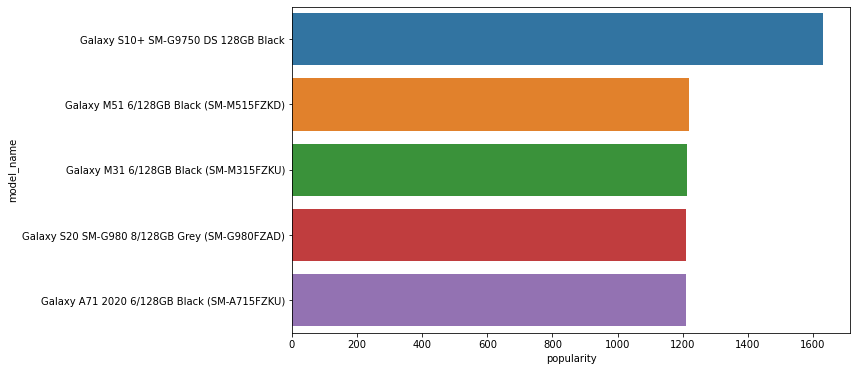

In [59]:
plt.figure(figsize=(10, 6))

sns.barplot(y='model_name', x='popularity', data=popular_samsung, orient='h')


### Plot the Most popular Operating System

In [64]:
os_valueCounts = df['os'].value_counts()

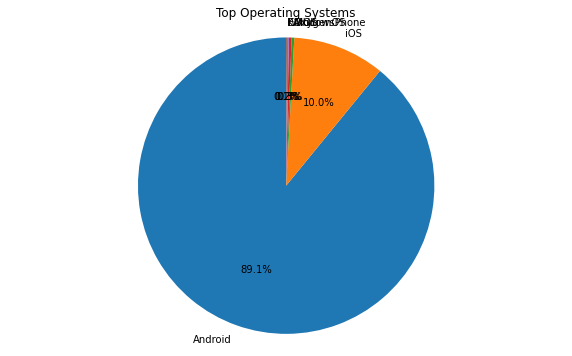

In [84]:
plt.figure(figsize=(10, 6))

os_valueCounts = os_valueCounts.sort_values(ascending=False)


plt.pie(os_valueCounts, labels=os_valueCounts.index, autopct='%1.1f%%',  startangle=90)

plt.axis('equal')  
plt.title('Top Operating Systems')

plt.show()


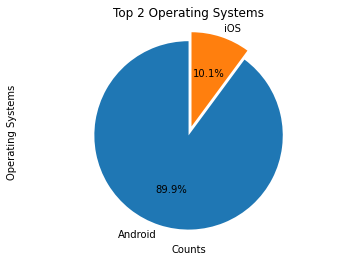

In [85]:
os_valueCounts = os_valueCounts.sort_values(ascending=False)


top_os = os_valueCounts.head(2)


top_os.plot(kind='pie', autopct='%1.1f%%', explode=(0.1, 0), startangle=90)



plt.axis('equal')  

plt.show()

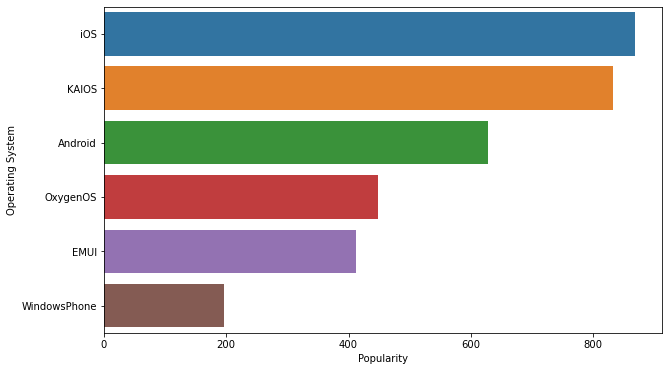

In [80]:
plt.figure(figsize=(10, 6))

sns.barplot(x='popularity', y='os', data=os_Popularity, orient='h')

plt.xlabel('Popularity')
plt.ylabel('Operating System')

plt.show()